# Latent diffusion

This tutorial demonstrates how to generate images with latent diffusion models.

In [1]:
# !git clone --depth 1 --single-branch https://github.com/NVlabs/edm2
# !pip install accelerate diffusers

In [2]:
import sys
import torch

sys.path.append("edm2")

from torchvision.transforms.functional import to_pil_image

from azula.plugins import eldm
from azula.sample import EABSampler  # DPM-Solver

device = "cuda"

In [3]:
_ = torch.manual_seed(0)

## Pre-trained latent diffusion model

In [4]:
denoiser, autoencoder = eldm.load_model("imagenet_512x512_xxl")
denoiser, autoencoder = denoiser.to(device), autoencoder.to(device)

Loading from /home/frozet/.cache/azula/hub/https.nvlabs-fi-cdn.nvidia.com.edm2.posthoc-reconstructions.edm2-img512-xxl-0939524-0.150.pkl


In [5]:
def postprocess(x):
    return torch.clip(x, min=0, max=1)

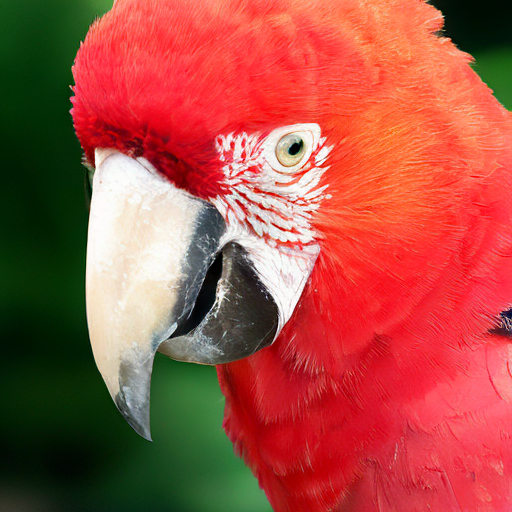

In [6]:
sampler = EABSampler(denoiser, steps=16).to(device)
label = torch.nn.functional.one_hot(torch.tensor(88), 1000).to(device)

z1 = sampler.init((1, 4, 64, 64))
z0 = sampler(z1, label=label)

with torch.no_grad():
    x = autoencoder.decode(z0)

to_pil_image(postprocess(x).squeeze())

## Classifier-free guidance

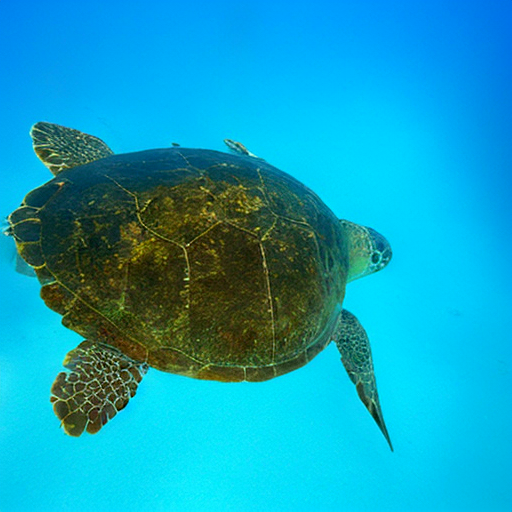

In [7]:
label = torch.nn.functional.one_hot(torch.tensor(33), 1000).to(device)

z1 = sampler.init((1, 4, 64, 64))
z0 = sampler(z1, label=label, omega=1.5)

with torch.no_grad():
    x = autoencoder.decode(z0)

to_pil_image(postprocess(x).squeeze())